### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics, model_selection, linear_model
from scipy.cluster.hierarchy import linkage, dendrogram, distance
from sklearn.cluster import KMeans
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

### Reading the data

In [2]:
customer = pd.read_csv("Data01.csv")
# dropping customer id as it is unique for each record
customer.drop("CustomerID", axis=1, inplace=True)

In [3]:
customer["Gender"] = customer["Gender"].replace({'Male':1, 'Female':0})
customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## EDA

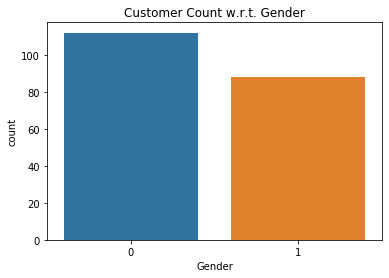

In [4]:
sns.countplot(customer["Gender"])
plt.title("Customer Count w.r.t. Gender")
plt.show()

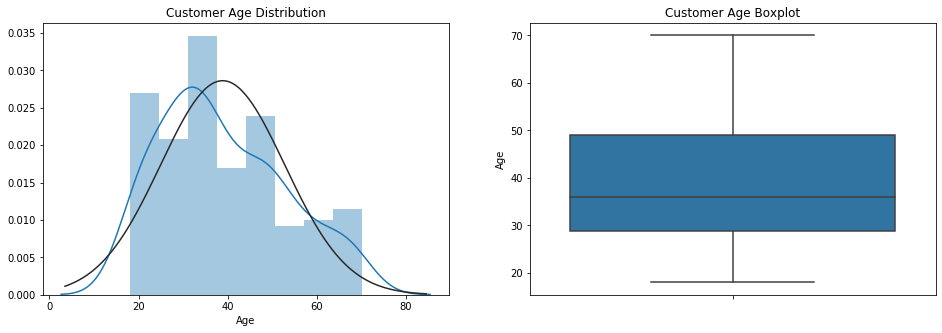

In [5]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
sns.distplot(customer["Age"], ax= ax[0], fit= stats.norm)
ax[0].set_title("Customer Age Distribution")
sns.boxplot(y = customer["Age"], ax = ax[1])
ax[1].set_title("Customer Age Boxplot")
plt.show()

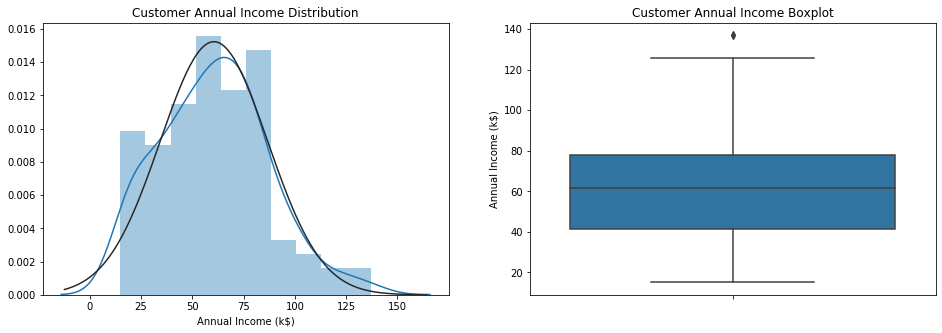

In [6]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
sns.distplot(customer["Annual Income (k$)"], ax= ax[0], fit= stats.norm)
ax[0].set_title("Customer Annual Income Distribution")
sns.boxplot(y = customer["Annual Income (k$)"], ax = ax[1])
ax[1].set_title("Customer Annual Income Boxplot")
plt.show()

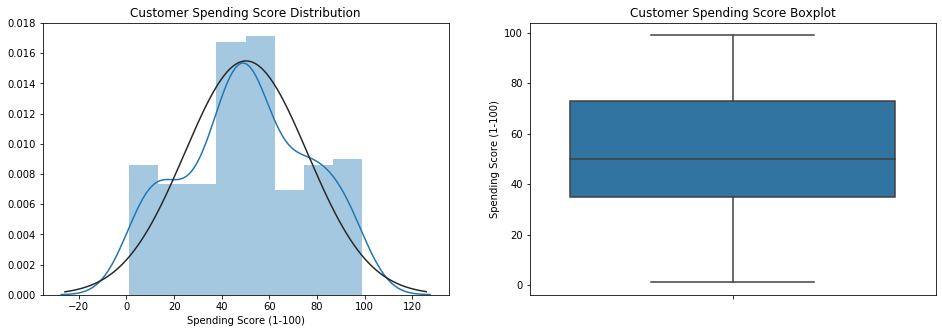

In [7]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
sns.distplot(customer["Spending Score (1-100)"], ax= ax[0], fit= stats.norm)
ax[0].set_title("Customer Spending Score Distribution")
sns.boxplot(y = customer["Spending Score (1-100)"], ax = ax[1])
ax[1].set_title("Customer Spending Score Boxplot")
plt.show()

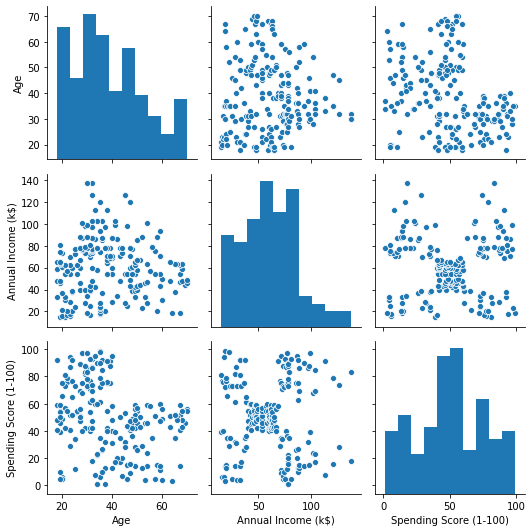

In [8]:
# Pairplot for the data
sns.pairplot(customer.iloc[:,1:])
plt.tight_layout()
plt.show()

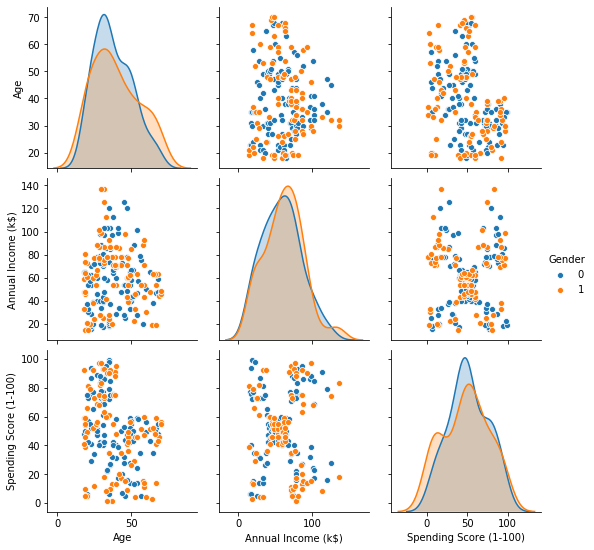

In [9]:
# Pairplot for the data w.r.t the Gender
sns.pairplot(customer, hue='Gender')
plt.show()

    We can see a pattern of clusters between Annual Income and the spending score.
    Also the gender does not seem to be useful in clustering, hence will not be using in the model.
    Hence we will make clusters using these Age, Annual Income and Spending Score

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std_age = pd.DataFrame(sc.fit_transform(customer.iloc[:,1:]), columns=customer.columns[1:])
X_std = pd.DataFrame(sc.fit_transform(customer.iloc[:,2:]), columns=customer.columns[2:])

    Experimented with and without age in the final data, better clustering was achieved without age.
    Hence will not be using it, also from EDA age does not have any significant pattern with other variables

### Clusters Including Age

In [11]:
def plot_k(k, inertia, sill):
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    ax[0].plot(k, inertia)
    ax[0].set_title("K vs Inertia")
    ax[0].set_ylabel("Inertia")
    ax[0].set_xlabel("No of Clusters")
    
    ax[1].plot(k, sill)
    ax[1].set_title("K vs Silhoutte Score")
    ax[1].set_ylabel("Silhoutte Score")
    ax[1].set_xlabel("No of Clusters")
    plt.show()

In [12]:
seed = 42

In [13]:
k = []
inertia = []
sill = []

for clust in range(2, 11):
    km = KMeans(n_clusters=clust, n_jobs=-1, n_init=25, max_iter=1000, random_state=seed)
    km.fit(X_std_age)
    k.append(clust)
    inertia.append(km.inertia_)
    sill.append(metrics.silhouette_score(X_std, km.labels_))

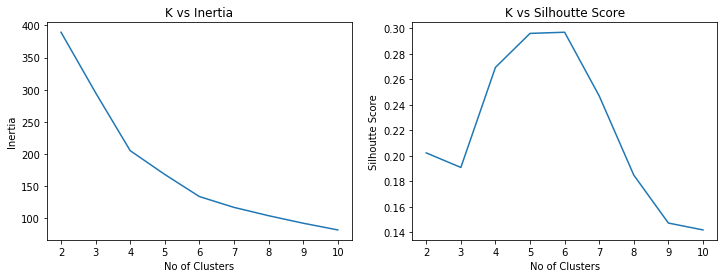

In [14]:
plot_k(k, inertia, sill)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=seed)
X_pca_age = pd.DataFrame(pca.fit_transform(X_std_age))
X_pca_age.head()

,0,1,2
0,-0.615720,-1.763481,1.324232
1,-1.665793,-1.820747,0.069952
2,0.337862,-1.674799,2.179025
3,-1.456573,-1.772430,0.078029
4,-0.038465,-1.662740,0.687342


In [16]:
k_pca = []
inertia_pca = []
sill_pca = []

for clust in range(2, 11):
    km = KMeans(n_clusters=clust, n_jobs=-1, n_init=25, max_iter=1000, random_state=seed)
    km.fit(X_pca_age)
    k_pca.append(clust)
    inertia_pca.append(km.inertia_)
    sill_pca.append(metrics.silhouette_score(X_std, km.labels_))

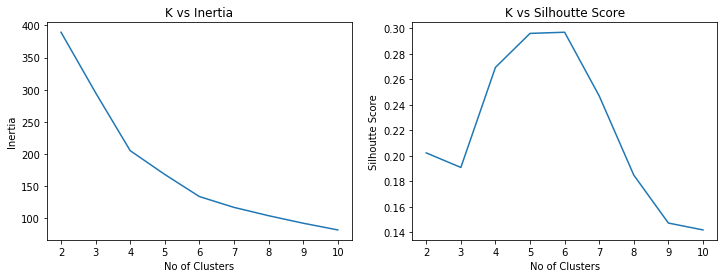

In [17]:
plot_k(k_pca, inertia_pca, sill_pca)

### Clusters excluding Age

In [18]:
seed = 42

In [19]:
k = []
inertia = []
sill = []

for clust in range(2, 11):
    km = KMeans(n_clusters=clust, n_jobs=-1, n_init=25, max_iter=1000, random_state=seed)
    km.fit(X_std)
    k.append(clust)
    inertia.append(km.inertia_)
    sill.append(metrics.silhouette_score(X_std, km.labels_))

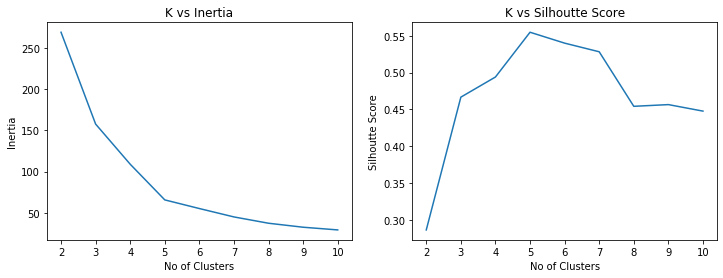

In [20]:
plot_k(k, inertia, sill)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=seed)
X_pca = pd.DataFrame(pca.fit_transform(X_std))

In [22]:
k_pca = []
inertia_pca = []
sill_pca = []

for clust in range(2, 11):
    km = KMeans(n_clusters=clust, n_jobs=-1, n_init=25, max_iter=1000, random_state=seed)
    km.fit(X_pca)
    k_pca.append(clust)
    inertia_pca.append(km.inertia_)
    sill_pca.append(metrics.silhouette_score(X_std, km.labels_))

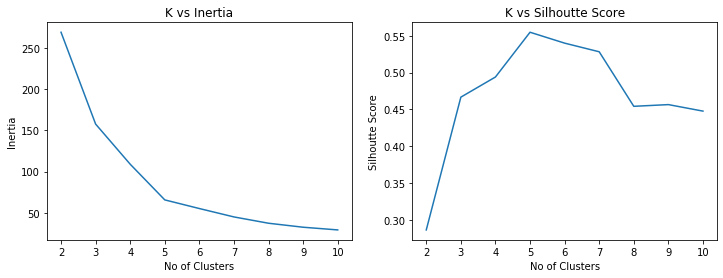

In [23]:
plot_k(k_pca, inertia_pca, sill_pca)

### We need to visualize clusters in both to cases to decide between 5/6 clusters

In [24]:
km5 = KMeans(n_clusters=5, n_jobs=-1, n_init=25, max_iter=1000, random_state=seed)
km5.fit(X_pca)

km6 = KMeans(n_clusters=6, n_jobs=-1, n_init=25, max_iter=1000, random_state=seed)
km6.fit(X_pca_age)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=6, n_init=25, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [25]:
X_pca["Label"] = km5.fit_predict(X_pca)
X_pca_age["Label"] = km6.fit_predict(X_pca_age)

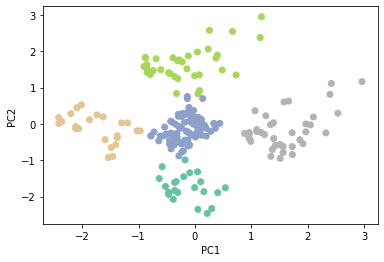

In [26]:
plt.scatter(X_pca.iloc[:,0], X_pca.iloc[:,1], c=X_pca["Label"], cmap=plt.cm.Set2)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

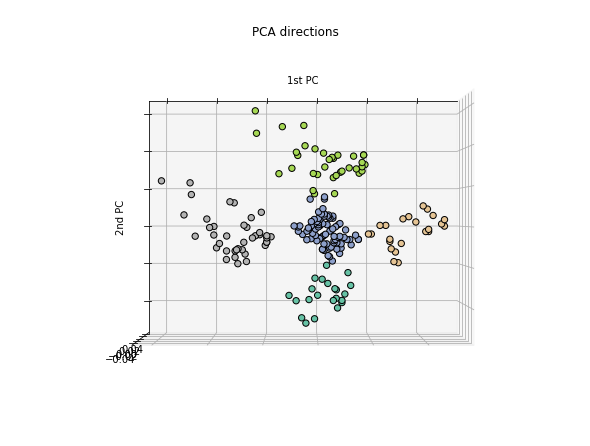

In [27]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-90, azim=90)
ax.scatter(X_pca.iloc[:,0], X_pca.iloc[:,1], c=X_pca["Label"],
           cmap=plt.cm.Set2, edgecolor='k', s=40)
ax.set_title("PCA directions")
ax.set_xlabel("1st PC")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd PC")
ax.w_yaxis.set_ticklabels([])
plt.show()

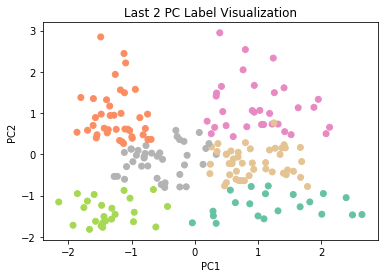

In [28]:
plt.scatter(X_pca_age.iloc[:,0], X_pca_age.iloc[:,1], c=X_pca_age["Label"], cmap=plt.cm.Set2)
plt.title("Last 2 PC Label Visualization")
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

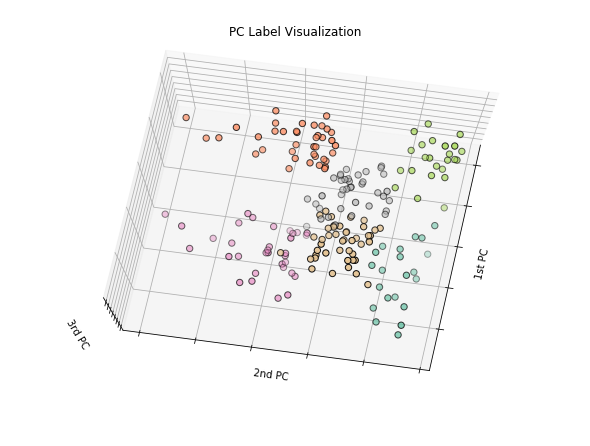

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-100, azim=170)
ax.scatter(X_pca_age.iloc[:,0], X_pca_age.iloc[:,1],X_pca_age.iloc[:,2], c=X_pca_age["Label"],
           cmap=plt.cm.Set2, edgecolor='k', s=40)
ax.set_title("PC Label Visualization")
ax.set_xlabel("1st PC")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd PC")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd PC")
ax.w_zaxis.set_ticklabels([])
plt.show()

### We can see from above visualizations that clearly 5 clusters wihtout Age are much more clearly defined and give us better information

Hence we will go ahead with 5 clusters using Annual Income and Spending Score

In [30]:
centroid = pd.DataFrame(km5.cluster_centers_)
centroid

,0,1
0,-0.139560,-1.740701
1,-0.160774,-0.123359
2,-0.162236,1.654235
3,-1.728511,-0.120599
4,1.577616,-0.175306


### Now we can check the cluster characteristics and inspect the data in each cluster

In [32]:
X_std["Label"] = X_pca["Label"]
X_std.groupby("Label")[["Annual Income (k$)","Spending Score (1-100)"]].mean()

,Annual Income (k$),Spending Score (1-100)
Label,,
0,-1.329545,1.132178
1,-0.200913,-0.026456
2,1.055003,-1.284439
3,-1.307519,-1.136965
4,0.991583,1.239503


In [33]:
customer["Label"] = X_pca["Label"]
customer.groupby("Label")[["Age","Annual Income (k$)","Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Label,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,32.692308,86.538462,82.128205


    It is observed from the above group charactersitics that group 2 has high income but low spending score. This group can
    be targeted to improve the sale.

### Conclusion : The number of clusters k=5 obtained using K-Means is the best value for given customers data.